# Cibernética e Aprendizagem de Máquina - Projeto 1

## Importando e visualizando dados

In [1]:
# Universidade de Brasília - Programa de Pós-Graduação em Sistemas Mecatrônicos (PPMEC)
# Aluno: Alceu Bernardes Castanheira de Farias
# Matrícula: 19/0144670
# Disciplina: Cibernética e Aprendizagem de Máquina - 1/2020
# Professor: Díbio Leandro Borges

# Esse notebook foi desenvolvido no Jupyter Notebook, como o primeiro projeto da disicplina de Cibernética e Aprendizagem de
# Máquinas, seguindo os passos do notebook 'Start Here: A Gentle Introduction' por Will Koehrsen, que pode ser encontrado em : 
# https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
#
#
# Importando as bibliotecas necessárias para o projeto:
#
# * Numpy = biblioteca para realização de operações artiméticas e funções numéricas para melhorar a manipulação dos dados.
# * Pandas = biblioteca que permite importar e salvar os dados em formato .csv, bem como facilita a visualização e tratamento
# dos dados.
# * Scikit Lean (SkLearn) = biblioteca com funções para realizar pré-processamento dos dados e utilizar algoritmos de 
# aprendizam de máquina. LabelEncoder permite lidar e codificar as diferentes labels/classificações.
# * Os = biblioteca para gerenciamento do sistema.
# * Warnings = ocultar e ignorar avisos.
# * Seaborn = biblioteca para visualização de dados por meio de diferentes tipos de gráficos.
# * Matplotlib = biblioteca base do Seaborn, também utilizada para visualização de dados e geração de gráficos, permitindo 
# ajustes finos aos mesmos.
#
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando os dados de treinamento do arquivo 'application_train.csv' usando Pandas. Exibindo informações de tamanho (shape)
# e mostrando os 5 primeiros valores para visualização dos dados.
app_train = pd.read_csv('data/input/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Importando os dados de teste do arquivo 'application_test.csv' usando Pandas. Exibindo informações de tamanho (shape)
# e mostrando os 5 primeiros valores para visualização dos dados.
app_test = pd.read_csv('data/input/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Análise Exploratória de Dados - Exploratory Data Analysis (EDA)

### Examinando a distribuição de dados na coluna 'TARGET'

In [4]:
# A coluna 'TARGET' contem os resultados dos empréstimos: '1' indica que o empréstimo não foi pago em tempo e '0' indica que o 
# empréstimo foi pago. O método value_counts() nos informa quantos '0's e '1's há na coluna 'TARGET' do dataframe de treino.
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

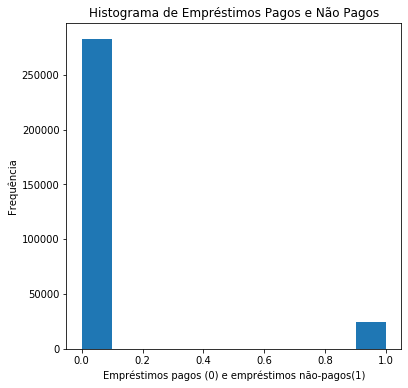

In [5]:
# Plotando um histograma nos permite visualizar de maneira gráfica o que foi apresentado na célula anterior: os dados são
# desbalanceados no sentido de que há muito mais '0's (empréstimos pagos) do que '1's (empréstimos que não foram pagos a 
# tempo).
hist_target = plt.figure(figsize = (6, 6))
app_train['TARGET'].astype(int).plot.hist();
plt.xlabel('Empréstimos pagos (0) e empréstimos não-pagos(1)');
plt.ylabel('Frequência');
plt.title('Histograma de Empréstimos Pagos e Não Pagos');

# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
hist_target.savefig('figs/hist_target.png', dpi = 300, bbox_inches = 'tight', transparent=True)

### Examinando valores faltantes

In [6]:
# Definindo uma função que permite calcular valores faltantes (que não foram preenchidos) em um dataframe (conjunto de dados).
def missing_values_table(df):
        # Somatório (sum) de todos os campos nulos no dataframe
        mis_val = df.isnull().sum()
        
        # Cálculo da porcentagem relativa ao tamaho total do dataframe
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Criando uma tabela com os resultados acima, concatenando ambos em torno do eixo das colunas (axis=1)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Renomeando as colunas
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Rearranjando os valores da nova tabela em ordem decrescente (maior porcentagem de valores faltantes no topo)
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Pritando informações complementares sobre o dataframe e quantos valores faltantes existem, bem como a quantidade
        # de colunas que possuem valores faltantes
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Retornando o dataframe com os valores faltantes e suas porcentagens
        return mis_val_table_ren_columns

In [7]:
# Estatísticas de dados faltantes no dataframe de treino, utilizando a função definida acima.
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


### Tipos de coluna

In [8]:
# Utilizando value_counts mas dessas vez para obter o número de cada tipo de dado existente no dataframe:
#
# float64 = valores numéricos com casas decimais
# int64 = valores numéricos inteiros
# object = valores não numéricos, contendo strings
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [9]:
# Número de classes únicas (unique) de cada tipo nas colunas do dataframe de treino.
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Codificação de labels/classificações e One-Hot Encoding

In [10]:
# Criando um objeto para codificação de labels com uso do LabelEncoder.
le = LabelEncoder()
le_count = 0

# Iterando em todas as colunas do dataframe de treino para buscar quais categorias são do tipo 'objeto' (não numéricas) para
# que sejam codificadas
for col in app_train:
    if app_train[col].dtype == 'object':
        # Se houverem 2 ou menos categorias únicas na coluna/feature, aplica-se o LabelEncoder, com uma classificação binária
        if len(list(app_train[col].unique())) <= 2:
            # Realizando treinamento (fit) na coluna atual dos dados de treinamento(app_train)
            le.fit(app_train[col])
            # Transformando tanto dados de treino quanto de teste com base nos dados codificados
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Incrementando o contador para rastrear quantas colunas foram modificadas e tiveram suas categorias codificadas
            le_count += 1

# Exbindo quantas colunas tiveram labels codificadas            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [11]:
# One-hot encoding é utilizada para codificar variáveis categóricas com mais de 2 labels, usando a função get_dummies do Pandas
# Mais uma vez aplica-se a técnica tanto aos dados de treino quanto de teste.
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


### Alinhando dados de treino e de teste

In [12]:
# Separando a coluna 'TARGET' que contem os labels dos dados de treino
train_labels = app_train['TARGET']

# Alinhamento dos dados de treino e de teste: manter somente as colunas (axis=1) que estejam presentes em ambos os dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Colocando novamente a coluna 'TARGET' no dataframe de treino
app_train['TARGET'] = train_labels

# Printando o tamanho dos dataframes de treino e de teste.
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


### Anomalias nos dados

In [13]:
# Os números presentes na coluna 'DAYS_BIRTH' são negativos porque são guardados em relação à data do empréstimo atual. 
# Multiplicando por -1 e divindo por 365, temos a informação em anos, e o método describe nos dá informações descritivas da
# coluna, como valor médio, máximo, mínimo, desvio padrão, etc. Nenhuma anomalia foi detectada.
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [14]:
# Já na coluna 'DAYS_EMPLOYED' temos um valor máximo que não faz sentido, pois é muito maior que os demais. É uma anomalia.
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

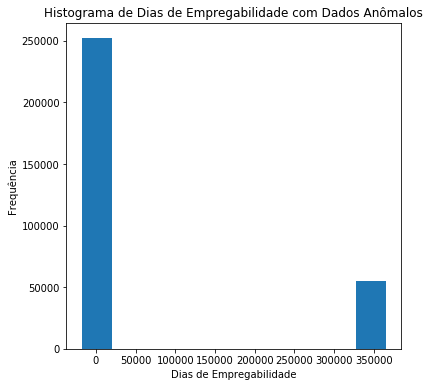

In [15]:
# Plotando um histograma da coluna 'DAYS_EMPLOYED' e visualizando graficamente essa anomalia.
hist_days_employed_anomalies = plt.figure(figsize = (6, 6))
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Histograma de Dias de Empregabilidade com Dados Anômalos');
plt.xlabel('Dias de Empregabilidade');
plt.ylabel('Frequência');

# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
hist_days_employed_anomalies.savefig('figs/hist_days_employed_anomalies.png', dpi = 300, bbox_inches = 'tight', transparent=True)

In [16]:
# Analisando os clientes cuja coluna 'DAYS_EMPLOYED' possui anomalia e analisando se esse dado é ou não padrão em relação ao
# resto dos clientes.

anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


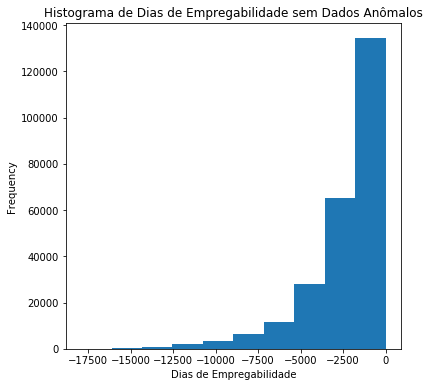

In [17]:
# Criando uma nova coluna com uma flag para indicar se há anomalia ou não em 'DAYS_EMPLOYED'
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Substituindo valores anômalos com o valor NaN (Not a Number)
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# Plotando um novo histograma após substituir os valores anômalos
hist_days_employed_no_anomalies = plt.figure(figsize = (6, 6))

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Histograma de Dias de Empregabilidade sem Dados Anômalos');
plt.xlabel('Dias de Empregabilidade');

# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
hist_days_employed_no_anomalies.savefig('figs/hist_days_employed_no_anomalies.png', dpi = 300, bbox_inches = 'tight', transparent=True)

In [18]:
# Localizando as anomalias no dataframe de teste e realizando a substituição dos mesmos por NaN
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# Printando quantos dados anômalos foram encontrados no dataframe de testes.
print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


### Correlações

In [19]:
# Encontrando correlações (corr) nos dados de treino com relação à coluna 'TARGET'. Ordenando os valores encontrados com 
# sort_values()
correlations = app_train.corr()['TARGET'].sort_values()

# Printando os resultados de correlação das variáveis em relação a 'TARGET'. O método head() exibe os primeiros valores de
# um dataframe (correlações maiores), enquanto o método tail() exibe os últimos valores do dataframe (correlações menores).
# Notar que a correlação de uma variável com ela mesma sempre será máxima (1).
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

### Efeito da idade nos pagamentos de empréstimo

In [20]:
# Encontrando correlação entre dias positivos de nascimento (idade) e 'TARGET
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

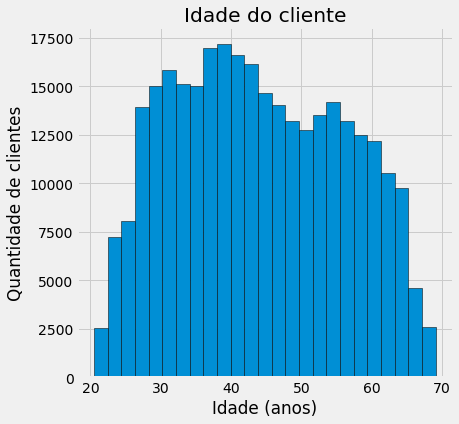

In [21]:
# Definindo o estilo do gráfico
plt.style.use('fivethirtyeight')

# Plotando a distribuição das idades dos clientes em anos.
clients_age = plt.figure(figsize = (6, 6))

plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Idade do cliente'); plt.xlabel('Idade (anos)'); plt.ylabel('Quantidade de clientes');

# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
clients_age.savefig('figs/clients_age.png', dpi = 300, bbox_inches = 'tight', transparent=True)

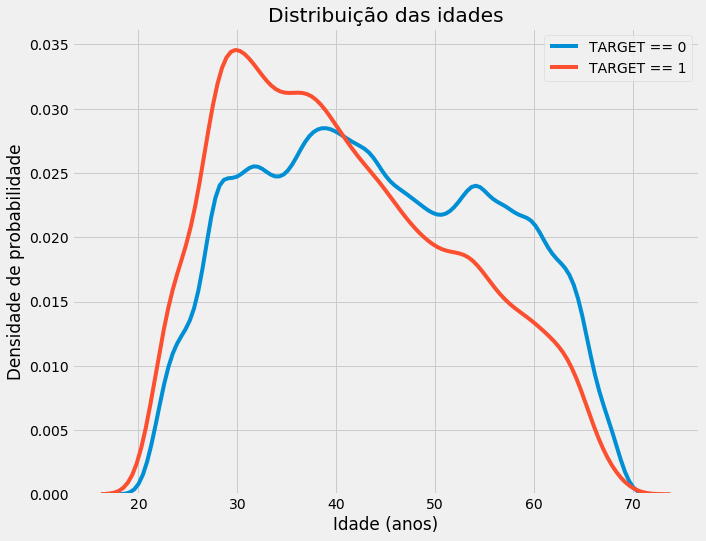

In [22]:
# Definindo tamanho da figura
kde_age = plt.figure(figsize = (10, 8))

# Um gráfico KDE (Kernel Density Estimate) é um método para visualizar a distribuição de observações em um conjunto de dados,
# análogo a um histograma. KDE representa os dados usando uma curva de densidade de probabilidade contínua em uma ou mais 
# dimensões.
#
# Gráfico KDE dos empréstimos pagos no prazo
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'TARGET == 0')

# Gráfico KDE dos empréstimos que não foram pagos no prazo
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'TARGET == 1')

# Atribuindo nome ao gráfico e aos eixos do gráfico
plt.xlabel('Idade (anos)'); plt.ylabel('Densidade de probabilidade'); plt.title('Distribuição das idades');

# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
kde_age.savefig('figs/kde_age.png', dpi = 300, bbox_inches = 'tight', transparent=True)

In [23]:
# Separando a informação de idade em um novo dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Distribuir a idade dos clientes em diferentes faixas etárias.
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [24]:
# Agrupando as faixas etárias (groupby) e calculando a média das mesmas.
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


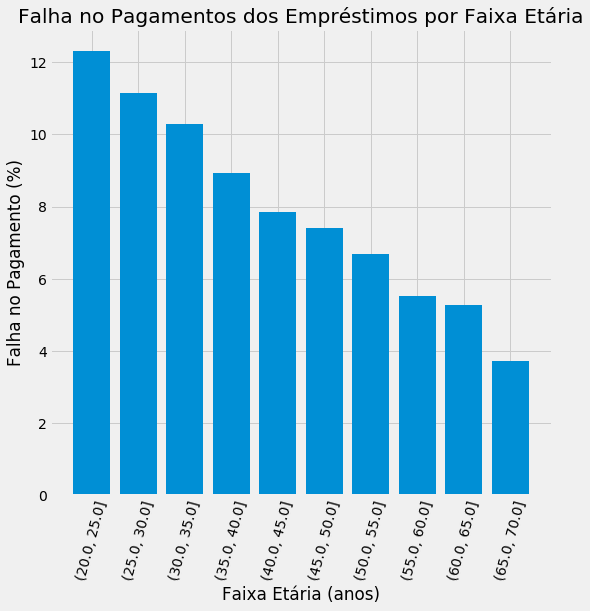

In [25]:
bar_payment_by_age = plt.figure(figsize = (8, 8))

# Gráfico de barras com as faixas etárias e média percentual de quantos empréstimos não foram pagos a tempo.
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Título e eixos do gráfico
plt.xticks(rotation = 75); plt.xlabel('Faixa Etária (anos)'); plt.ylabel('Falha no Pagamento (%)')
plt.title('Falha no Pagamentos dos Empréstimos por Faixa Etária');

# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
bar_payment_by_age.savefig('figs/bar_payment_by_age.png', dpi = 300, bbox_inches = 'tight', transparent=True)

### Fontes extrenas de dados

In [26]:
# Extraindo as variáveis externas e mostrando correlação com a variável 'TARGET'
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


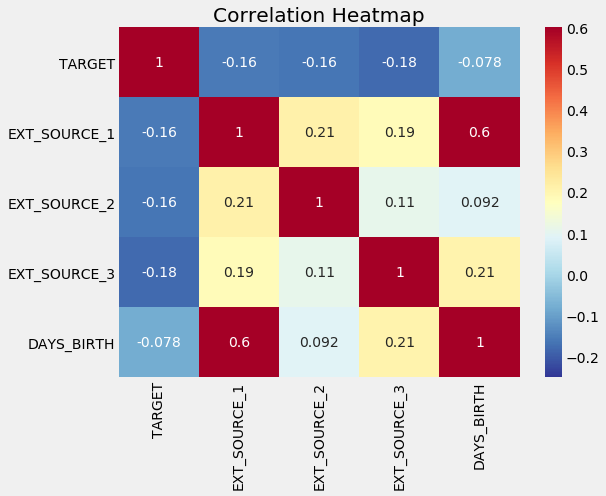

In [27]:
corr_heatmap = plt.figure(figsize = (8, 6))

# Mapa de calor das correlações
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
corr_heatmap.savefig('figs/corr_heatmap.png', dpi = 300, bbox_inches = 'tight', transparent=True)

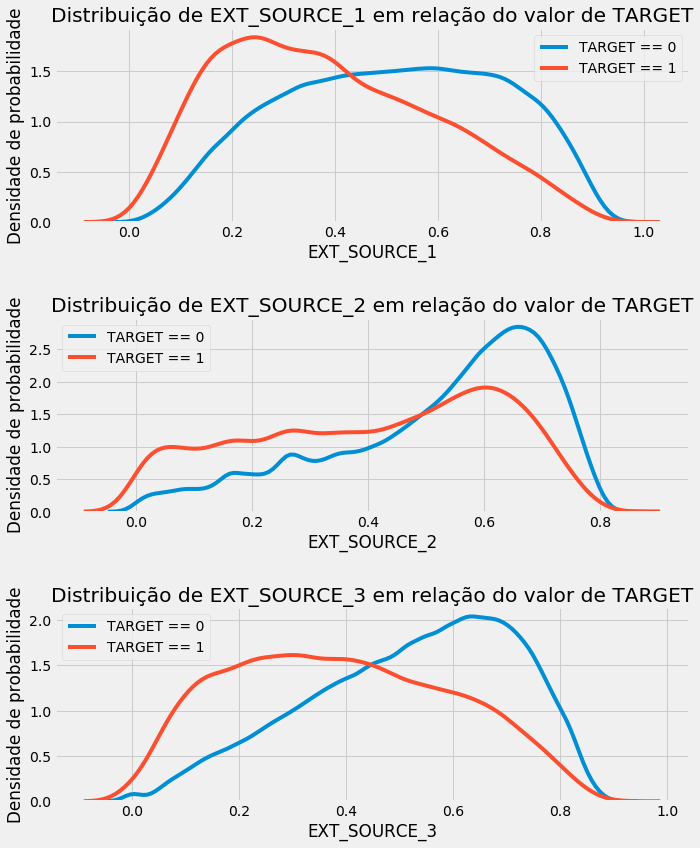

In [28]:
dist_ext_sources = plt.figure(figsize = (10, 12))

# Iterando em cada fonte externa de dados
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # Criando um novo subplot para cada fonte externa de dados
    plt.subplot(3, 1, i + 1)
    # Plotando empréstimos pagos
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'TARGET == 0')
    # Plotando empréstimos não pagos
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'TARGET == 1')
    
    # Título e eixos dos gráficos
    plt.title('Distribuição de %s em relação do valor de TARGET' % source)
    plt.xlabel('%s' % source); plt.ylabel('Densidade de probabilidade');
    
plt.tight_layout(h_pad = 2.5)

# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
dist_ext_sources.savefig('figs/dist_ext_sources.png', dpi = 300, bbox_inches = 'tight', transparent=True)

### Pair Plot

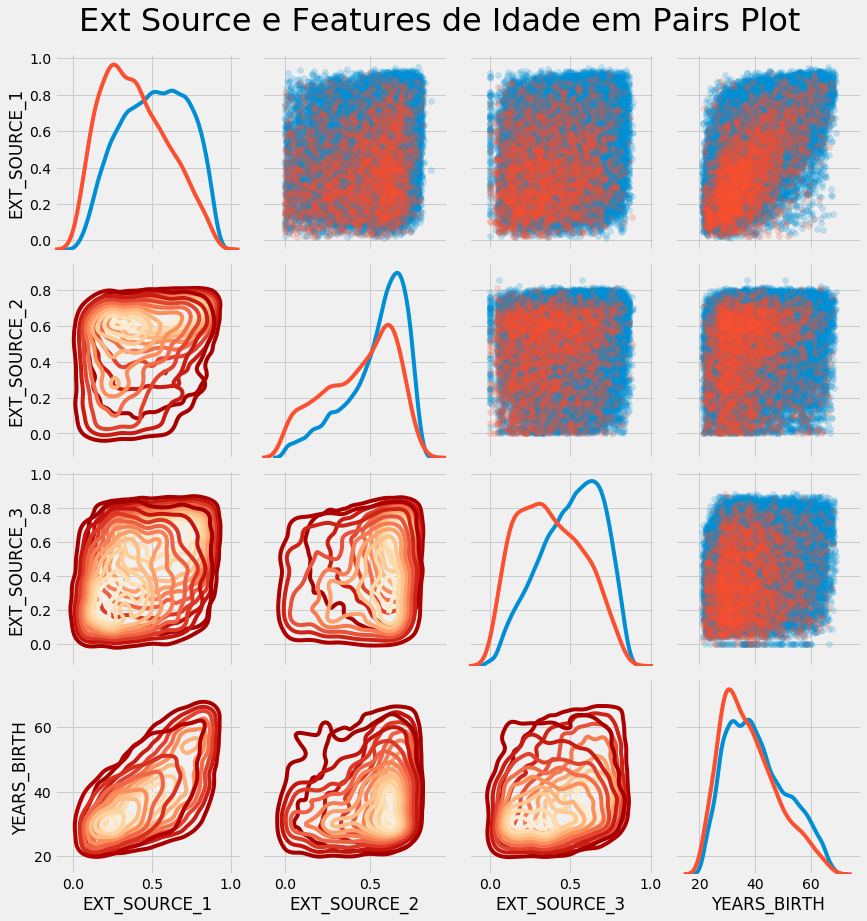

In [29]:
# Copiando data para plotar
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Adicionar a idade dos clientes em anos
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Elimando valores indisponíveis (dropna) e limitando dados para plotagem às primeiras 100000 linhas
plot_data = plot_data.dropna().loc[:100000, :]

# Função para cálculo do coeficiente de correlação entre variáveis de duas colunas
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Criando o grid de plotagem para os pares
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Os gráficos acima da diagonal principal são gráficos de dispersão
grid.map_upper(plt.scatter, alpha = 0.2)

# Os gráficos da diagonal principal são gráficos KDE
grid.map_diag(sns.kdeplot)

# Os gráficos abaixo da diagonal principal são plots de densidade
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source e Features de Idade em Pairs Plot', size = 32, y = 1.05);

# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
grid.savefig('figs/pair_plot_grid.png', dpi = 300, bbox_inches = 'tight', transparent=True)

## Engenharia de Features

In [30]:
# Construindo um novo dataframe para features polinomiais
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# Imputer para lidar com valores faltantes. A partir da versão 0.20, o Imputer foi substituido pelo SimpleImputer e por isso
# foi alterado no código.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Transformando dados faltantes com o estimador SimpleImputer nos dataframes com features polinomiais, tanto de treino quanto
# de teste.
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Criando um objeto polinomial com um grau específico
poly_transformer = PolynomialFeatures(degree = 3)

In [31]:
# Treinando as features polinomiais
poly_transformer.fit(poly_features)

# Transformando as features polinomiais e imprimindo o tamanho
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [32]:
# Observando quais as features polinomiais utilizadas
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [33]:
# Criando dataframe com as features polinomiais 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Addicionando a coluna 'TARGET'
poly_features['TARGET'] = poly_target

# Achando as correlações com 'TARGET'
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Printando as features com correlações mais positivas e mais negativas 
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [34]:
# Colocando as features de teste em um novo dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Unindo features polinomiais no dataframe de treino
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Unindo features polinomiais no dataframe de teste
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Alinhando os dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Printando as informações dos tamanhos do novos dataframes de treino e teste
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


### Features de Conhecimento do Domínio

In [35]:
# Aqui são introduzidas novas features com base em informações específicas sobre o domínio da nossa aplicação. São elas:
#
# CREDIT_INCOME_PERCENT: porcentagem de crédito em relação à renda de um cliente
# ANNUITY_INCOME_PERCENT: porcentagem da anuidade do empréstimo em relação à renda de um cliente
# CREDIT_TERM: o comprimento do pagamento a ser efetuado em meses 
# DAYS_EMPLOYED_PERCENT: porcentagem de dias em empregabilidade em relação à idade de um cliente
#
# Essas features são obtidas em https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features e calculadas abaixo.

app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

# Calculando as features para os dados de treino
app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

# Calculando as features para os dados de teste
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

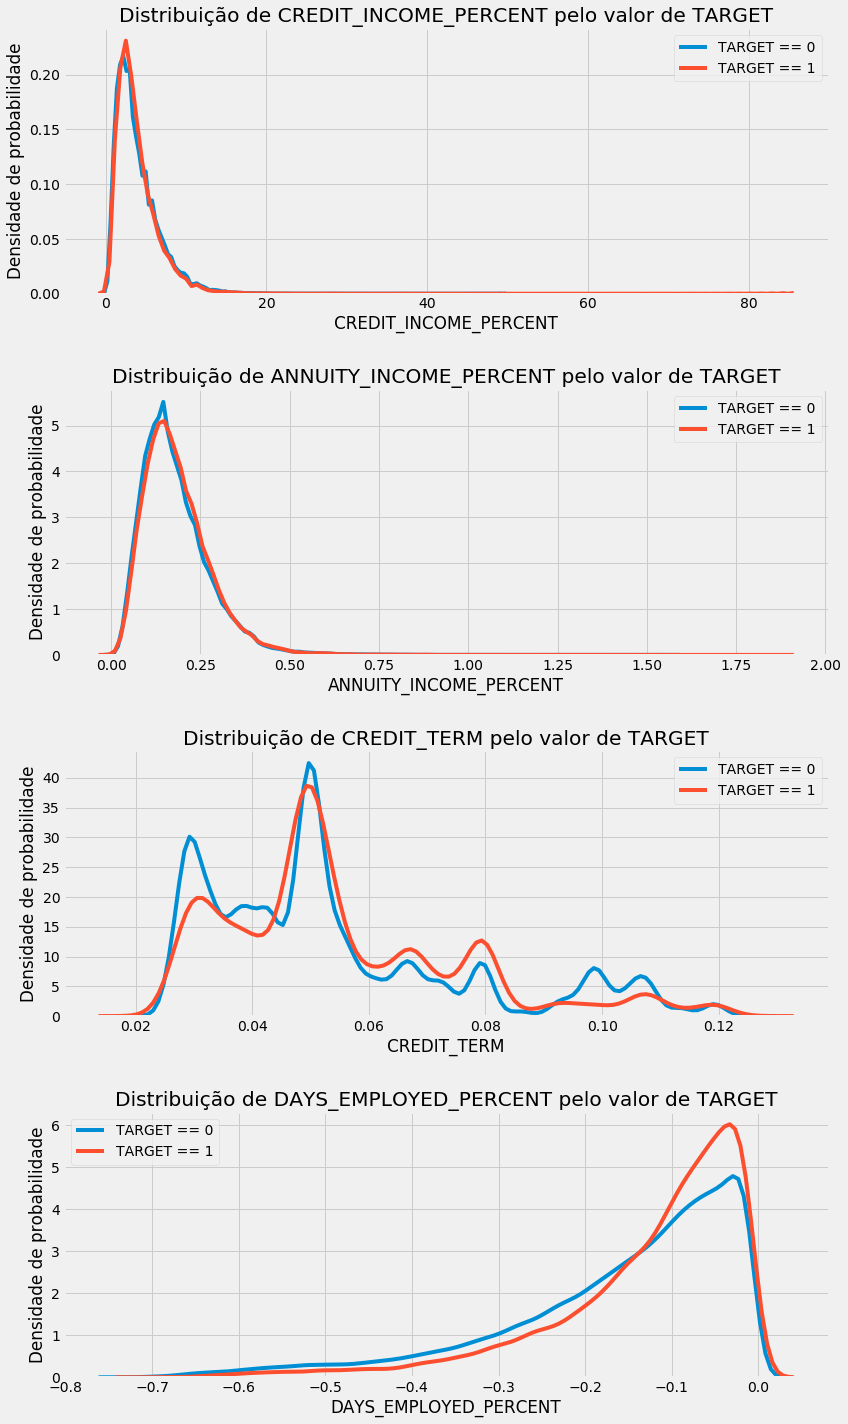

In [36]:
dist_domain_features = plt.figure(figsize = (12, 20))
# Iterando em cada feature nova
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # Criando um novo subplot para cada feature nova
    plt.subplot(4, 1, i + 1)
    # Plotando empréstimos pagos
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'TARGET == 0')
    # Plotando empréstimos não pagos
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'TARGET == 1')
    
    # Título e eixos do gráfico
    plt.title('Distribuição de %s pelo valor de TARGET' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Densidade de probabilidade');
    
plt.tight_layout(h_pad = 2.5)

# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
dist_domain_features.savefig('figs/dist_domain_features.png', dpi = 300, bbox_inches = 'tight', transparent=True)

### Baseline

### Regressão Logística 

In [37]:
# Importando da biblioteca Scikit Learn MinxMaxScaler (escalonamento das faixas de valores dos dados) e Simpleimputer, 
# substituindo mais uma vez o Imputer de versões anteriores.
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Retirando a coluna TARGET dos dados de treino
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Obtendo o nome das features
features = list(train.columns)

# Copiando os dados de teste
test = app_test.copy()

# Mais uma vez utilizando SimpleImputer com estratégia de substituir valores faltantes pela mediana dos valores da coluna, ao
# invés de Imputer das versões antigas do Scikit Learn
imputer = SimpleImputer(strategy = 'median')

# Mudando a escala de cada feature para a faixa entre 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Preenchendo valores faltantes nos dados de treino
imputer.fit(train)

# Transformando dados de treino e de teste
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repetindo a operação com o Scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


In [38]:
# Importando o algoritmo de Regressão Logística do Scikit Learn
from sklearn.linear_model import LogisticRegression

# Parãmetros do modelo de Regressão Logística. Outra mudança aqui, nas versões mais recentes o solver utilizado é o 'lbfgs',
# enquanto no notebook original o solver padrão utilizado era 'liblinear'. Testes com ambos os solver foram realizados. Para
# realizar testes usando o solver 'liblinear', utilizar a segunda linha. Para realizar testes com o solver 'lbfgs', utilizar
# a primeira linha, sem o parâmetro de solver explícito.

log_reg = LogisticRegression(C = 0.0001)
#log_reg = LogisticRegression(C = 0.0001, solver='liblinear')

# Treinando com os dados de treino
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
# Fazendo predições com o método predict_proba que retorna duas colunas: probabilidade do empréstimo ser pago '0' e a 
# probabilidade do empréstimo não ser pago '1'. Temos interesse na segunda coluna.
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [40]:
# Dataframe de submissão do dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.078515
1,100005,0.137926
2,100013,0.082194
3,100028,0.080921
4,100038,0.132618


In [41]:
# Salvando os resultados em um arquivo .csv
submit.to_csv('data/output/log_reg_baseline.csv', index = False)

### Modelo melhorado: Floresta Aleatória

In [42]:
# Importando classificador de floresta aleatória do Scikit Learn
from sklearn.ensemble import RandomForestClassifier

# Construindo o classificador
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [43]:
# Treinando com o conjunto de dados de treino
random_forest.fit(train, train_labels)

# Extraindo features importantes
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Fazendo predições com o classificador de floresta aleatória
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished


In [44]:
# Salvando os dados em um novo dataframe para submissão
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Salvando o dataframe em um arquivo .csv
submit.to_csv('data/output/random_forest_baseline.csv', index = False)

### Fazendo Predições usando as Features construídas

In [45]:
# Importando os nomes das features polinomiais 
poly_features_names = list(app_train_poly.columns)

# Utilizando o SimpleImputer nas features polinomiais
imputer = SimpleImputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Utilizando o Scaler nas features polinomiais
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

# Construindo o Classificador de Floresta Aleatória para as features polinomiais
random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [46]:
# Treinando o classificador floresta aleatória com dados de treino polinomiais
random_forest_poly.fit(poly_features, train_labels)

# Fazendo predições com o novo classificador
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.0s finished


In [47]:
# Salvando dados em um novo dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Salvando o dataframe em um arquivo.csv
submit.to_csv('data/output/random_forest_baseline_engineered.csv', index = False)

### Testando as features de conhecimento de domínio

In [48]:
# Retirando a coluna 'TARGET' dos dados de treino com features do conhecimento de domínio
app_train_domain = app_train_domain.drop(columns = 'TARGET')

# Obtendo o novo das novas features
domain_features_names = list(app_train_domain.columns)

# Aplicando SimpleImputer para os dados com features de conhecimento de domínio
imputer = SimpleImputer(strategy = 'median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

# Aplicando Scaler para os dados com features de conhecimento de domínio
scaler = MinMaxScaler(feature_range = (0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

# Criando classificador de floresta aleatória para os dados de feature de conhecimento de domínio
random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Treinando com dados de treino
random_forest_domain.fit(domain_features, train_labels)

# Extraindo a importância das features
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# Fazendo predições usando os dados de teste
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.0s finished


In [49]:
# Salvando dados em um novo dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Salvando o dataframe em um arquivo.csv
submit.to_csv('data/output/random_forest_baseline_domain.csv', index = False)

### Interpretação do modelo: Importância das Features

In [50]:
# Definição da função que calcula a importância das features. Esta função foi modificada em relação ao notebook original para
# retornar a figura do plot de importância das features, para que ela possa ser salva com o comando savefig do Matplotlib.
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Ordenar features de acordo com o valor de importância (ordem decrescente)
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalizando a importância das features, para que somadas cheguem ao valor de 1
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Plotar gráfico de barras horizontal com a importância das features
    fi_fig = plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Revertendo o índice, para garantir que a feature mais importante apareceça no topo do gráfico
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Definindo yticks e labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Título e eixos do gráfico
    plt.xlabel('Importância normalizada'); plt.title('Importância das features')
    plt.show()
    
    return df, fi_fig

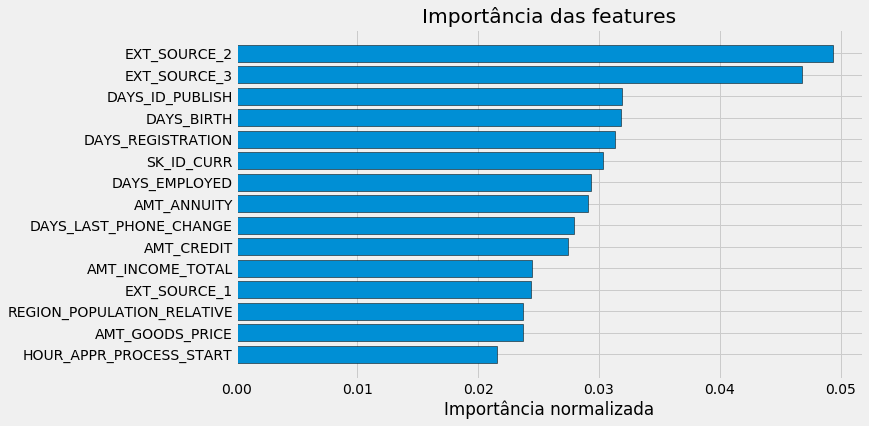

In [51]:
# Plotando a importância das features para as features originais
feature_importances_sorted, fi_sorted = plot_feature_importances(feature_importances)

In [52]:
# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
fi_sorted.savefig('figs/fi_sorted.png', dpi = 300, bbox_inches = 'tight', transparent=True)

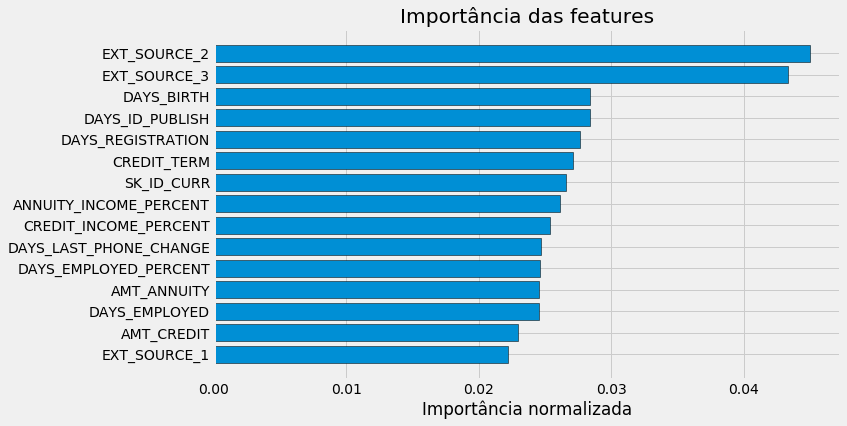

In [53]:
# Plotando a importância das features incluindo as features de conhecimento de domínio
feature_importances_domain_sorted, fi_domain_sorted = plot_feature_importances(feature_importances_domain)

In [54]:
# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
fi_domain_sorted.savefig('figs/fi_domain_sorted.png', dpi = 300, bbox_inches = 'tight', transparent=True)

### Light Gradient Boosting Machine

In [55]:
# Instalando lightgbm. Executar este comando somente na primeira vez que usar o notebook, caso lightgbm não esteja instalado
# ainda.

#!pip install lightgbm

In [56]:
# Importando métricas e modelos do Scikit Learn, junto com lightgbm para implementar um modelo superior aos apresentados
# até então, pelo método de Light Gradient Bossting Machine
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extraindo IDs
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extraindo label para treinamento
    labels = features['TARGET']
    
    # Removendo IDs e TARGET
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align dataframes pelas colunas
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # Sem índices categóricos para gravar
        cat_indices = 'auto'
    
    # Decoficação de labels com números inteiros
    elif encoding == 'le':
        
        # Criando LabelEncoder
        label_encoder = LabelEncoder()
        
        # Lista para armazenar índices categóricos
        cat_indices = []
        
        # Iterando em cada coluna
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Mapeando as features categóricas para inteiros
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Salvando os índices categóricos
                cat_indices.append(i)
    
    # Erro em caso de codificação de label não ser válido
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extraindo nomes das features
    feature_names = list(features.columns)
    
    # Convertendo para arrays np (Numpy)
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Criando o objeto kfold (cria índices de treino/teste para dividir dados em conjuntos de treino/teste)
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Criando array vazio para importância das features
    feature_importance_values = np.zeros(len(feature_names))
    
    # Criando array vazio para predições de teste
    test_predictions = np.zeros(test_features.shape[0])
    
    # Criando array vazio para predições out_of_fold (predições feitas em conjuntos de testes composto por dados não usados 
    # para treinar o modelo)
    out_of_fold = np.zeros(features.shape[0])
    
    # Listas para gravar as pontuações de validação e treinamento
    valid_scores = []
    train_scores = []
    
    # Iteranado a cada fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Treinando dados para o fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Dados de validação para o fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Criando o modelo
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Treinando o modelo
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Gravando a melhor iteração
        best_iteration = model.best_iteration_
        
        # Gravando a importância das features
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Fazendo predições
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # RGravando predições out of fold
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Gravando a melhor pontuação
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Limpando memória
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Criando o novo dataframe (dataframe de submissão)
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Criando o dataframe de importância de features
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Pontuação geral de validação
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Adicionando pontuações gerais às métricas
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Necessário para criar dataframes com pontuações de validação
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe com pontuação de validação
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [57]:
# Utilizando a função definida acima e printando valores de baseline e métricas
submission, fi, metrics = model(app_train, app_test)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (307511, 239)
Testing Data Shape:  (48744, 239)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.798723	train's binary_logloss: 0.547797	valid's auc: 0.755039	valid's binary_logloss: 0.563266
[400]	train's auc: 0.82838	train's binary_logloss: 0.518334	valid's auc: 0.755107	valid's binary_logloss: 0.545575
Early stopping, best iteration is:
[315]	train's auc: 0.816657	train's binary_logloss: 0.530116	valid's auc: 0.755215	valid's binary_logloss: 0.552627
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.798409	train's binary_logloss: 0.548179	valid's auc: 0.758332	valid's binary_logloss: 0.563587
[400]	train's auc: 0.828244	train's binary_logloss: 0.518308	valid's auc: 0.758563	valid's binary_logloss: 0.545588
Early stopping, best iteration is:
[317]	train's auc: 0.8169	train's binary_logloss: 0.529878	valid's auc: 0.758754	valid's binary_logloss: 0.552413
Training until validation scores don't impr

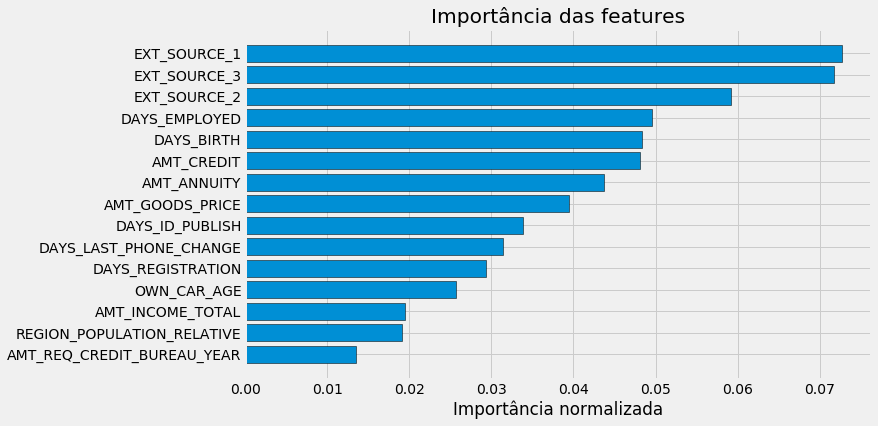

In [58]:
# Plotando a importância das features
fi_sorted, fi_sorted_lgb = plot_feature_importances(fi)

In [59]:
# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
fi_sorted_lgb.savefig('figs/fi_sorted_lgb.png', dpi = 300, bbox_inches = 'tight', transparent=True)

In [60]:
# Salvando o dataframe resultante em um arquivo .csv
submission.to_csv('data/output/baseline_lgb.csv', index = False)

In [61]:
# Separando a coluna TARGET dos dados de treino
app_train_domain['TARGET'] = train_labels

# Testando as features de conhecimento de domínio
submission_domain, fi_domain, metrics_domain = model(app_train_domain, app_test_domain)
print('Baseline with domain knowledge features metrics')
print(metrics_domain)

Training Data Shape:  (307511, 243)
Testing Data Shape:  (48744, 243)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.804779	train's binary_logloss: 0.541283	valid's auc: 0.762511	valid's binary_logloss: 0.557227
Early stopping, best iteration is:
[268]	train's auc: 0.815523	train's binary_logloss: 0.530413	valid's auc: 0.763069	valid's binary_logloss: 0.550276
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.804016	train's binary_logloss: 0.542318	valid's auc: 0.765768	valid's binary_logloss: 0.557819
Early stopping, best iteration is:
[218]	train's auc: 0.807075	train's binary_logloss: 0.539112	valid's auc: 0.766062	valid's binary_logloss: 0.555952
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.8038	train's binary_logloss: 0.542856	valid's auc: 0.7703	valid's binary_logloss: 0.557925
[400]	train's auc: 0.834559	train's binary_logloss: 0.511454	valid's auc: 0.770511	valid's binary_

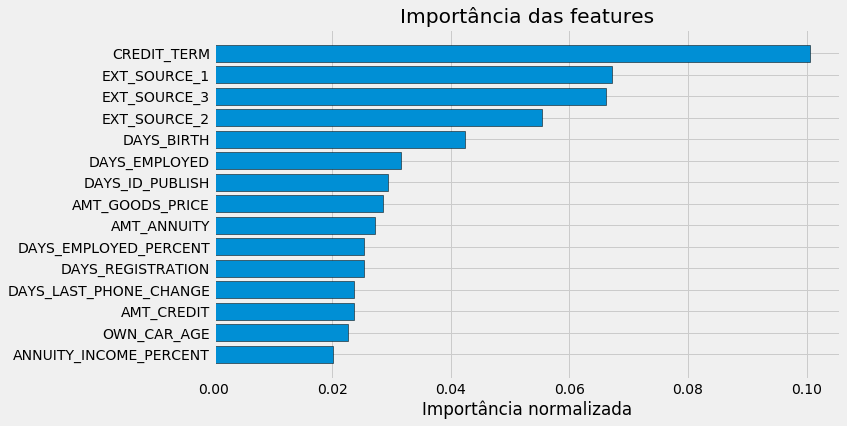

In [62]:
# Plotando a importância das features incluindo as features de conhecimento de domínio.
fi_sorted, fi_domain_sorted_lgb = plot_feature_importances(fi_domain)

In [63]:
# Salvando figura. O argumento bbox_inches = 'tight' remove as bordas brancas em excesso da figura
fi_domain_sorted_lgb.savefig('figs/fi_domain_sorted_lgb.png', dpi = 300, bbox_inches = 'tight', transparent=True)

In [64]:
# Salvando o dataframe resultante em um arquivo .csv
submission_domain.to_csv('data/output/baseline_lgb_domain_features.csv', index = False)